In [31]:
import pydicom as dicom
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pydicom as dicom
import matplotlib.pyplot as plt
import pydicom
import numpy as np
import scipy 
from scipy import signal
from mpl_toolkits import mplot3d
from PIL import Image
from pylab import *
from scipy import ndimage
import imageio
import sys
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot as mp
import operator
from PIL import Image
from PIL import ImageDraw
from PIL import Image
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import time
import datetime

from scipy import ndimage
from ipywidgets import *

from IPython import display
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import gridspec
from os.path import basename
import warnings
warnings.filterwarnings('ignore')

In [32]:
img = dicom.dcmread("SANSIBILIT-D2-3W.DCM") #import Dicom acquisition  
img = img.pixel_array

In [33]:
pp=img[0]
sc2=img[1]
sc1=img[2]
sc=sc1+sc2
ppc=pp+((-1)*(sc))
ppc1w=pp+((-1)*(sc1))

for i in  range  (128):
    for j in  range  (128):
        if ppc[i,j]<0 :
            ppc[i,j]=0
            
for i in  range  (128):
     for j in  range  (128):
        if ppc1w[i,j]<0 :
            ppc1w[i,j]=0
            


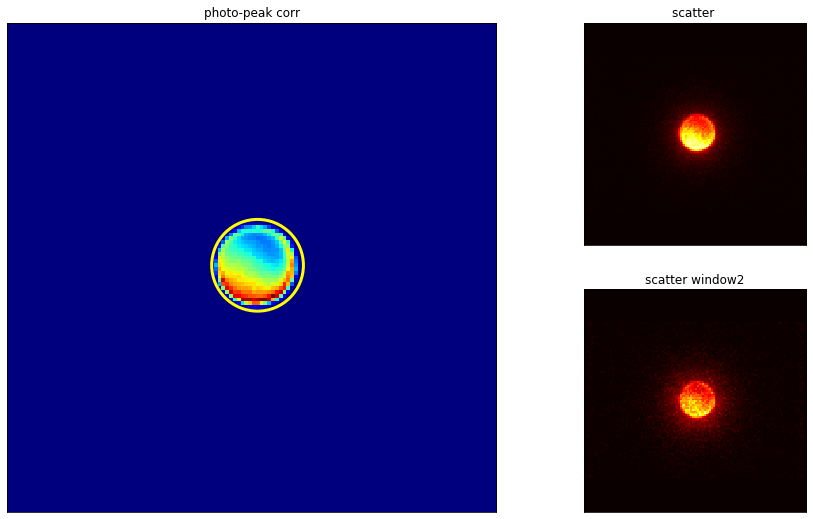

In [34]:
p=ppc
c=sc
plt.rcParams['figure.figsize'] = (15,9)
_min, _max = 1,5376
fig = plt.figure()
gs = gridspec.GridSpec(2, 3)
ax1 = fig.add_subplot(gs[0,2])
im1 = ax1.imshow(sc, cmap="hot", vmin = np.min(sc), vmax = np.max(sc))
ax1.set_title('scatter ')
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)
ax1.axes.autoscale(False)


ax2 = fig.add_subplot(gs[1,2])
im2 = ax2.imshow(sc2, cmap="hot", vmin = np.min(sc2), vmax = np.max(sc2))
ax2.set_title('scatter window2')
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
ax2.axes.autoscale(False)


ax3 = fig.add_subplot(gs[:,:-1])
im3 = ax3.imshow(p, cmap="jet", vmin = np.min(p), vmax = np.max(p))
ax3.set_title('photo-peak corr')
ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)
ax3.axes.autoscale(False)



#divider3 = make_axes_locatable(ax3)
#cax3 = divider3.append_axes("right", size="5%", pad=0.1)

#line1a = ax1.axes.plot([1,2], [1,2], color='blue', linestyle='-', linewidth=1)
#line1b = ax1.axes.plot([1,2],[1,2],  color='blue', linestyle='-', linewidth=1)
c1 = plt.Circle((65, 63), 12, fill=False, color='yellow', linewidth=3)
ax3.axes.add_patch(c1)
#c2 = plt.Circle((65, 61), 13, fill=False, color='yellow', linewidth=3)
#ax1.axes.add_patch(c2)
#c3 = plt.Circle((65, 61), 13, fill=False, color='yellow', linewidth=3)
#ax2.axes.add_patch(c3)


In [35]:
circle_ppc = np.zeros((128,128))
x0=63
y0=65
R=12
for i in range (128):
    for j in range ( 128):
            if (i-x0)**2+(j-y0)**2 < (R)**2 :
                    circle_ppc[i,j] = ppc[i,j]
                    
circle_ppc1w = np.zeros((128,128))
x0=63
y0=65
R=12
for i in range (128):
    for j in range ( 128):
            if (i-x0)**2+(j-y0)**2 < (R)**2 :
                    circle_ppc1w[i,j] = ppc1w[i,j]

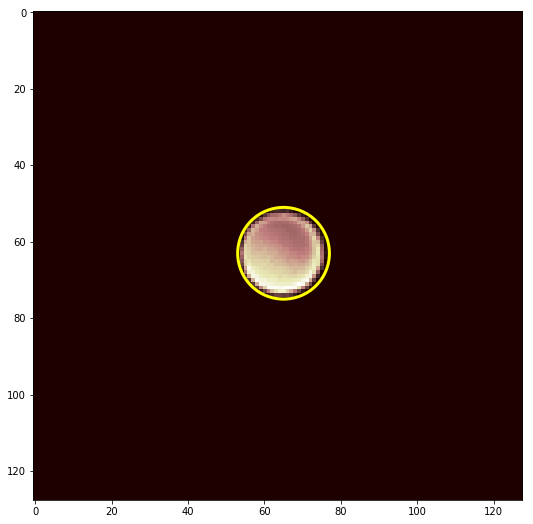

In [36]:
plt.rcParams['figure.figsize'] = (15,9)

fig = plt.figure()
gs = gridspec.GridSpec(2, 3)
ax3 = fig.add_subplot(gs[:,:-1])
im3 = ax3.imshow(circle_ppc, cmap="pink")
c1 = plt.Circle((65, 63), 12, fill=False, color='yellow', linewidth=3)
ax3.axes.add_patch(c1)

In [37]:
A_total = 39 # l'activité de la seringue pleine (MBq)
t_total=0      #temps de mesure  l'activité de seringue pleine (min)
A_svide=2.6  # l'activité de la seringue vide (MBq)
t_svide=5      #temps de mesure  l'activité de la seringue vide (min)
t_s1=397       #temps de comencent d'acqusition detecteur  (min)

t_aq=10        #duré d'acqusition (min)
t_p=793.2      #periode physique de I-123 (min)
#correction de l'activité de la seringue vide .
A_svide0=(A_svide * exp((log(2)*t_svide)/t_p))
#correction de l'activité   .
A_totalc=A_total-A_svide0
# l'activité au moment de commencement d'acquisition detecteur .
A_01=A_totalc * exp((-log(2)*t_s1)/t_p)

# l'activité moyenne entre le debut et la fin d'acquisition detecteur  .
A_m1=(A_01 *(t_p/log(2))* (1-exp(-log(2)*t_aq/t_p)))/t_aq

print('average activity ',A_m1,'MBq')

s=(np.sum(circle_ppc))/(A_m1 * t_aq *60 )
s1w=(np.sum(circle_ppc1w))/(A_m1 * t_aq *60 )

print('sansivility with three windows method for scatter correction',round(s,2),'cps/s/MBq')
print('sansivility with one window method for scatter correction ',round(s1w,2),'cps/s/MBq')


average activity  25.609584788393942 MBq
sansivility with three windows method for scatter correction 66.59 cps/s/MBq
sansivility with one window method for scatter correction  68.86 cps/s/MBq
